<a href="https://colab.research.google.com/github/SpringsteinM/RISM-Examples/blob/main/RISM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
!pip install open_clip_torch -q

In [56]:
import torch
from PIL import Image
import open_clip
from io import BytesIO
import requests
from IPython.display import display
import io
import zipfile
import csv
import imageio
import numpy as np
from torchvision.transforms.functional import to_pil_image

In [57]:
model_name = "hf-hub:timm/ViT-B-32-SigLIP2-256"

device = "cuda" if torch.cuda.is_available() else "cpu"
model, _, preprocess = open_clip.create_model_and_transforms(
  model_name,
  pretrained=None,
  device=device,
)
model.eval()  # model in train mode by default, impacts some models with BatchNorm or stochastic depth active
tokenizer = open_clip.get_tokenizer(model_name)


In [58]:
images = [
    "https://digital.slub-dresden.de/data/kitodo/MozaXII_518148890/MozaXII_518148890_tif/jpegs/00000001.tif.original.jpg",
    "https://digital.slub-dresden.de/data/kitodo/MozaDon_501055444/MozaDon_501055444_tif/jpegs/00000005.tif.original.jpg",
    "http://commons.wikimedia.org/wiki/Special:FilePath/Gma-doc-00036-1155.jpg",
    "https://digital.slub-dresden.de/data/kitodo/GrimPass_1755863748/GrimPass_1755863748_tif/jpegs/00000065.tif.original.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/0249eb4e1d0459d2a1a8c66c3bc95423_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/0249eb4e1d0459d2a1a8c66c3bc95423_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/028d4dfda4a35c70a72516ece73da313_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/086e0d352c7d5a52b9e7131cca07633e_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/0a044c85991e50f1b3e89c4336646d9e_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/0b1c7712e39a5b0d93b2e2a3af9ce3fd_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/0c66d8c054a15a839abce9ad24b10b00_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/11349dd5b7e352a4911d19a254c4114a_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/11fc8faa2d275cf2ad6fab6642bc2b91_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/12d4cfd42543505892809fc80c8a9816_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/186f779f1e7c58218d5aef76fb180999_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/197536767b9a5962bd75180817038dda_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/19813d70cf5c50f897bb7f3c9f698159_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/1c5d31fcc0165d3cadb63898a0bbd8ad_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/1fd4f80f2ec35679a215bbf557aa2a22_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/2043a0752f715684b789bc762f13c47d_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/27a7988dfdf55665a2bf924f05d65b96_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/285c93e88dc854d28c7e718c4ffbae66_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/2bedbcfadb4450e4ab0f27014b553f2c_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/2c2741d801e957d3baf0c235fe52e8ed_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/2d1de2426d1157308606587cd8147fd3_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/311a71177d8f5904955610fa6594a9b0_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/3327da6e220a5b64b16a0ebf12452f7a_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/3458fa4d6337544d856736ba690034eb_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/347263f1543c5ab3ab269a8815eb0abb_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/3486d50b564150758fbe2b8099b717e2_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/365902faa5b15d97a2e9cd412a7189c9_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/37af3b98e4e55c49a3c4e11e16b34ebb_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/3b4f161996e454679239e496324bdcd8_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/3e9f542517575f2b97ed7fb42fd3a1db_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/3f62dfcf80555f1eaf2a942646838f5a_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/3f9ba03e34495a4ab90ec12aa11a1c61_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/405277550c9453958dca12fb5757c5b2_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/411b2b8221815d35b6a1d6fa37137f2e_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/414f3b8fd6ae506faa67bd59b4b18616_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/4240240892ff5086b0f97f8811b9f968_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/484e9808f44b5e19b7cd3bdd117b0d66_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/4b0befa5f02f5a119ba19fab6e3cc9b7_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/4bcbf0fe8c9852da970d9fa4116b8907_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/4c2110b818d85118991e1ffbbcd7f1fa_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/4d5e6a3db9f05acd9f3dead5de3a452a_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/4dc1bf455731592b9be557b0c42b092a_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/51aae8ce6d025722930c7a01ea37d3a9_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/53cf52b46fbc5383b8975e027b7d6445_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/544e55e730845a2d90f290892b7a8722_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/549cd2bae04d5321bdb0f6ec634c6372_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/5516f09cc9c25cd49bb79d02da439a30_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/5534a7d9b8875839987f72a95fb69fe5_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/55deda0c9fc050939f345249fdb32e5a_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/5711be98fd25557184809147b889d2a8_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/572c38b2e7195afeb5d0b853b80cb004_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/58b6100833eb543d895d3b9217b73907_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/5aa9d46ab4f650049ac3c2b1fb402b38_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/5c2198333a7d5614bf77ff806e67a535_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/5c9d301e57d55deb808bda5035233230_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/5f4dd958eee8521e86dc13d1d015ae2a_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/606e0085136a5196b10524b9a1c221c9_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/60ddf51e34545ea5b67a1c448c8050a4_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/629f047f971858289bef4519c01610d2_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/6324e9aa6a905054981786b391daa964_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/632a2983718a59b487ddc6e02d9e0fa5_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/6391bdf0ebac51d084a9ba4ee2675456_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/63a5e96e960b5f0fa05a00857051e565_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/6716c592486b5100bce2c5cd6acdac1b_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/67ae9ef9e25256bf8647de937befd822_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/67b90c4fa05754189565e206b88e08ed_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/6a2a0f3b96c1584aadf56bd64477c4d4_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/6b3774d4a08e5851b7f662d43f6b9fe7_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/6d2f02b4470451e5ad42b2cf7fdbcd21_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/6d9b904498175fd0948669d4acd7bbfe_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/71428cc5629f59da91d7af2f749af750_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/739cd0479b265520bf0dc26a80ac8b8d_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/751a89cfccdf5e7d93a7abfe4728f75b_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/772f84f8b5c35212a9a489e32c9242a8_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/776bf8d2e6ec56b5a1f55a1e71d59ade_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/77ceb9ec7d1b518baafd73426728f194_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/7848b078338a5d0a8fef8dae98785021_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/78fe6d81a7a65cef9e75750065c40ea4_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/7aaab97ec6fe5e8aa35f4b783ee96784_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/7be4804a88cc5a1db6769d32f9d6314f_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/7de949c92277596182c8a319a2ef7bae_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/7e0e895aba5e54e6bec2d87b4f077261_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/7e4d1c00895f518ba75a6edd4adab0e3_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/8352e64451e055649f253ba0fd40d03d_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/842d32dbb30453eaa4076ffbdbb9921c_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/8662f440ef1d5704aa261dbfa7362505_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/86668ffa3ca8583c85ea3a49bace5247_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/873853ec572e5817b1b62bccda41eebb_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/87c5b28ee87356d9a5436fc51cbad101_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/89d0db856dd85313bfa7de63c0e2dca7_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/8aab462408d8563195bb7adc705bb702_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/8b677afe0d7f56ccbcb9055da2e0e0ba_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/8bbb6a5cd9635919aca889587b81b9dd_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/8d80ccb418cb5e5193a186d5ade47bb6_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/8eeba626142251b68286d4f5b9687c47_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/92b97ff7e9975e88a298d4f4ce1ad3d1_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/941423f815795005897937b36cf2a4c7_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/95683e9e1cb85e088be2850aabc47a24_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/970b019ef40351a69b58a1e3dd955968_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/981535f3d0d557cd9bd6534a6aa8705a_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/9a1eaebdf05f5da38ad95777da34c09a_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/9c2ce9dea19b5bd6ae6fcfd4fc18a7ce_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/9e721029e219572f94ead04ecced8de1_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/9f4521ab175b56d5a99c57f4306d794b_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/a13520ee88615ff5903f444981d7ee50_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/a37be5653218578e863ae28fac89d3b4_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/a5b5c3e4223e54978015aca73494fd89_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/a88f9203f2505caca509829d74d78658_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/a952dce69ce6575c8886a6f28580fd0c_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/aa14366600165a48974bbc99bc4134a9_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/aa9d60682dff5980be43e42793f092b6_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/aba41f1a11be58ca99c6721e0c02c5f2_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/abb50f5d26ed5eacaccfda7a19e32e84_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/abc0b59ee8d55e5883ef9b69cdc47439_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/ac7692647b625b1ba7b996c140f6467d_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/acd5d75169995860a5f703eb484be324_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/ae11bdb15f22572e92fe07d8fdf892bd_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/aeb895b6a8fa5f2590751d311b52d218_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/b0daaa725d60530aa8cbb4096910cc18_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/b10867b96f255cbcae476c8eeec6ebaa_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/b24121cba8775aa891000908f3f38396_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/b5875d50c64a517f8d8458e34b3e27f5_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/b8548c91a0fe54259d71f1e923831086_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/ba09aa5441835596b280bd76914706d3_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/bc319b2248b95dadafa91fd7382715cb_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/bc44979471cb556a942256a3043b687c_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/bcbc031fe9fa5697a102cd13f605695e_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/bccf910663af5a08b60c3a4e250a08e6_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/bd445d6821065b3a82099dd233e1c39d_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/be2f09a9b7695e3da1ddeba6a214c77a_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/be63f6f3297e5e2ebce74f8ab44d4004_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/be8a6983c46b588a8cff2c9b1bae7dea_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/bf9ea1e53f835009a0e3806419ac2315_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/c057b2900cd65ea0a938c13dd7d3cfbc_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/c13f5934a60d5c698e4cef1cd9db6a37_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/c3398d19316957d2afd54e180e2b2c30_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/c3f1f185de315e6eac84182cf4d265c0_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/c5129b68a03f5d17b2caa28cf5d6b147_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/c76e7e868aa355c9b75eba8a666a7306_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/c7eeeb73ff245e22ba31b39e1569ee8c_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/cb025eda994f5873b77991bdf0c3befc_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/cbfd4e5436895ad9a9efffb56ade1387_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/cdc8f3e74be058789236ed87113bbff1_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/d0026d7dc4e45c4f8133ed1c9256a246_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/d46dc8e0d6df58f691fbc7c1f4db4be0_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/d548a54fe4835012b62a7290294cc4e1_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/d662231b5d8e5665be676fe05ee74dd0_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/d9db90f645a35e3faa5d2898a9d12fa5_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/de0cfa7cca655363b40b9be6c535b65c_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/de66232faca95bf6916126a3cc6a117b_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/e2cb9674e1aa5af5abfe652760199323_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/e489b826c87e5a0c995f2ae15824f1c9_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/e4be806f3ad75a95be073ad9c10887bc_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/e78c630603c753098a1d498e3a54b37a_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/e7a7f2db642d5c3fb48a0ace4e311b9e_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/e8c12121506e568bacfab72769e24e7c_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/ea9f62f299915dba8ebd9e7865d13ef0_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/eba59a33cec65a53bfb90c047d70fd92_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/ebb16606908151449669875f3ada0778_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/ebbdef389d9d5d4a8138bfebff16cb78_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/f002576e95ab59778190205642d2aa57_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/f07e0ce097a450f08b13f27ecec2afce_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/f1f181d4af3959809043a25008bbc76d_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/f32dda1e235154d2afc6438270c7eb72_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/f37992ea5d5958b683bc6671529eb0c3_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/f5813dbd50a9563e9d99f655f2d82b33_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/f7f5a97d04e953f3a9e56e96746034ff_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/fbe1900f1a4c5f76b417f05a164c875c_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/fc84136d9ed85276bfac9afedab2af0b_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/fd7f435a72f85030bfef741659a9d66d_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/fe9b7cfa4df45f65ab4a9320c63269c2_m.jpg",
"https://raw.githubusercontent.com/SpringsteinM/RISM-Examples/refs/heads/main/images/fec0ba74894d526d9bcd7414080372d3_m.jpg",
    ]


## Creating an Index

In [ ]:
headers = {
    'User-Agent': 'My User Agent 1.0',
    'From': 'm@m.de'  # This is another valid field
}
from IPython.display import display

image_index = []

with torch.no_grad(), torch.autocast("cuda"):
  for image_url in images:
    try:
      image_data = requests.get(image_url, headers=headers).content
      image = Image.open(BytesIO(image_data))
      image_tensor = preprocess(image).unsqueeze(0)
      image_features = model.encode_image(image_tensor)
      image_features /= image_features.norm(dim=-1, keepdim=True)

      image_index.append([image_url, image, image_features])
    except:
      pass

/usr/local/lib/python3.12/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


## Search for Images Using Text Descriptions

In [ ]:
text = 'mozart' #@param {type:"string"}

text = tokenizer([text])


with torch.no_grad(), torch.autocast("cuda"):
    text_features = model.encode_text(text)
    text_features /= text_features.norm(dim=-1, keepdim=True)

scores = []

for x in image_index:
    image_features = x[2]
    text_probs = image_features @ text_features.T
    scores.append(text_probs.cpu().detach().numpy().squeeze())
scores = np.asarray(scores)

from IPython.display import display
import matplotlib.pyplot as plt
for x in np.argsort(-scores)[:5]:

  fig, axs = plt.subplots(1, 1)
  axs.imshow(image_index[x][1])
  plt.title(f"similarity {scores[x]}")

In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
for x in np.argsort(-scores)[:5]:

  fig, axs = plt.subplots(1, 1)
  axs.imshow(image_index[x][1])
  plt.title(f"similarity {scores[x]}")

## Search for Images with Query Image

Saving 00000001.tif.original.jpg to 00000001.tif.original (1).jpg


/tmp/ipython-input-3233091017.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = preprocess(to_pil_image(imageio.imread(v)[...,0:3])).unsqueeze(0)
/tmp/ipython-input-3233091017.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  axs.imshow(imageio.imread(v)[...,0:3])


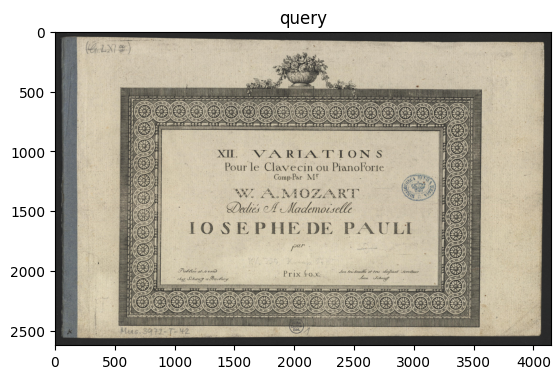

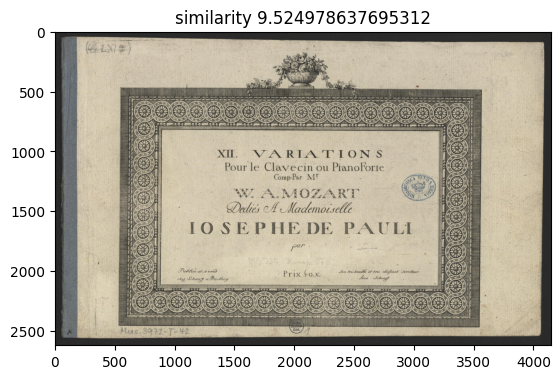

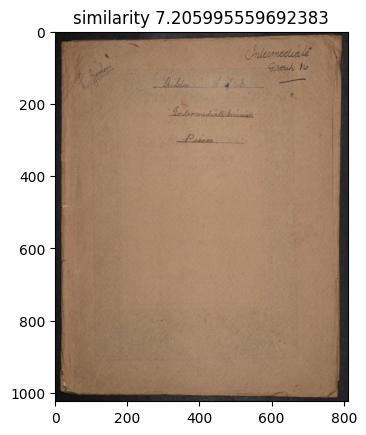

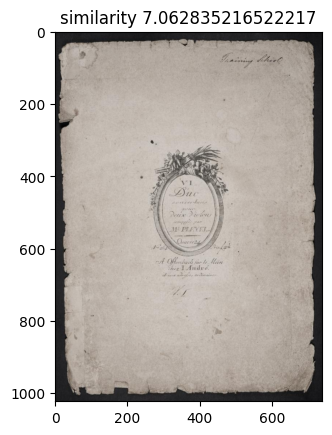

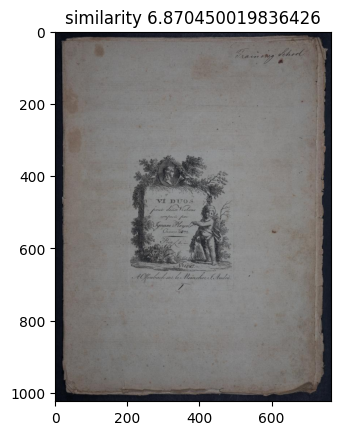

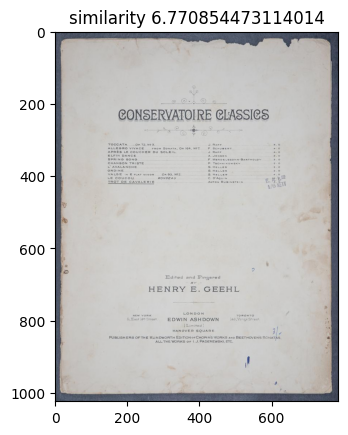

In [54]:
from google.colab import files
import imageio
uploaded = files.upload()


scores = []
import matplotlib.pyplot as plt
for k, v in uploaded.items():
  image = preprocess(to_pil_image(imageio.imread(v)[...,0:3])).unsqueeze(0)
  with torch.no_grad():
    query_image_feature = model.encode_image(image)


    for x in image_index:
        image_features = x[2]
        probs = image_features @ query_image_feature.T
        scores.append(probs.cpu().detach().numpy().squeeze())
    scores = np.asarray(scores)

fig, axs = plt.subplots(1, 1)
axs.imshow(imageio.imread(v)[...,0:3])
plt.title(f"query")

for x in np.argsort(-scores)[:5]:

  fig, axs = plt.subplots(1, 1)
  axs.imshow(image_index[x][1])
  plt.title(f"similarity {scores[x]}")